The purpose of this notebook is to plot the observable radiation from an electron emitting synchrotron radiation confined to a region by a magnetic field. This is problem 6.3 in Radiative Processes in Astrophysics (Rybicki). The following picture shows the confinment of the electron by a magnetic field between points 1 and 2. The electron will reflect back and forth between these two points as if they are "magnetic mirrors" while emitting radiation.

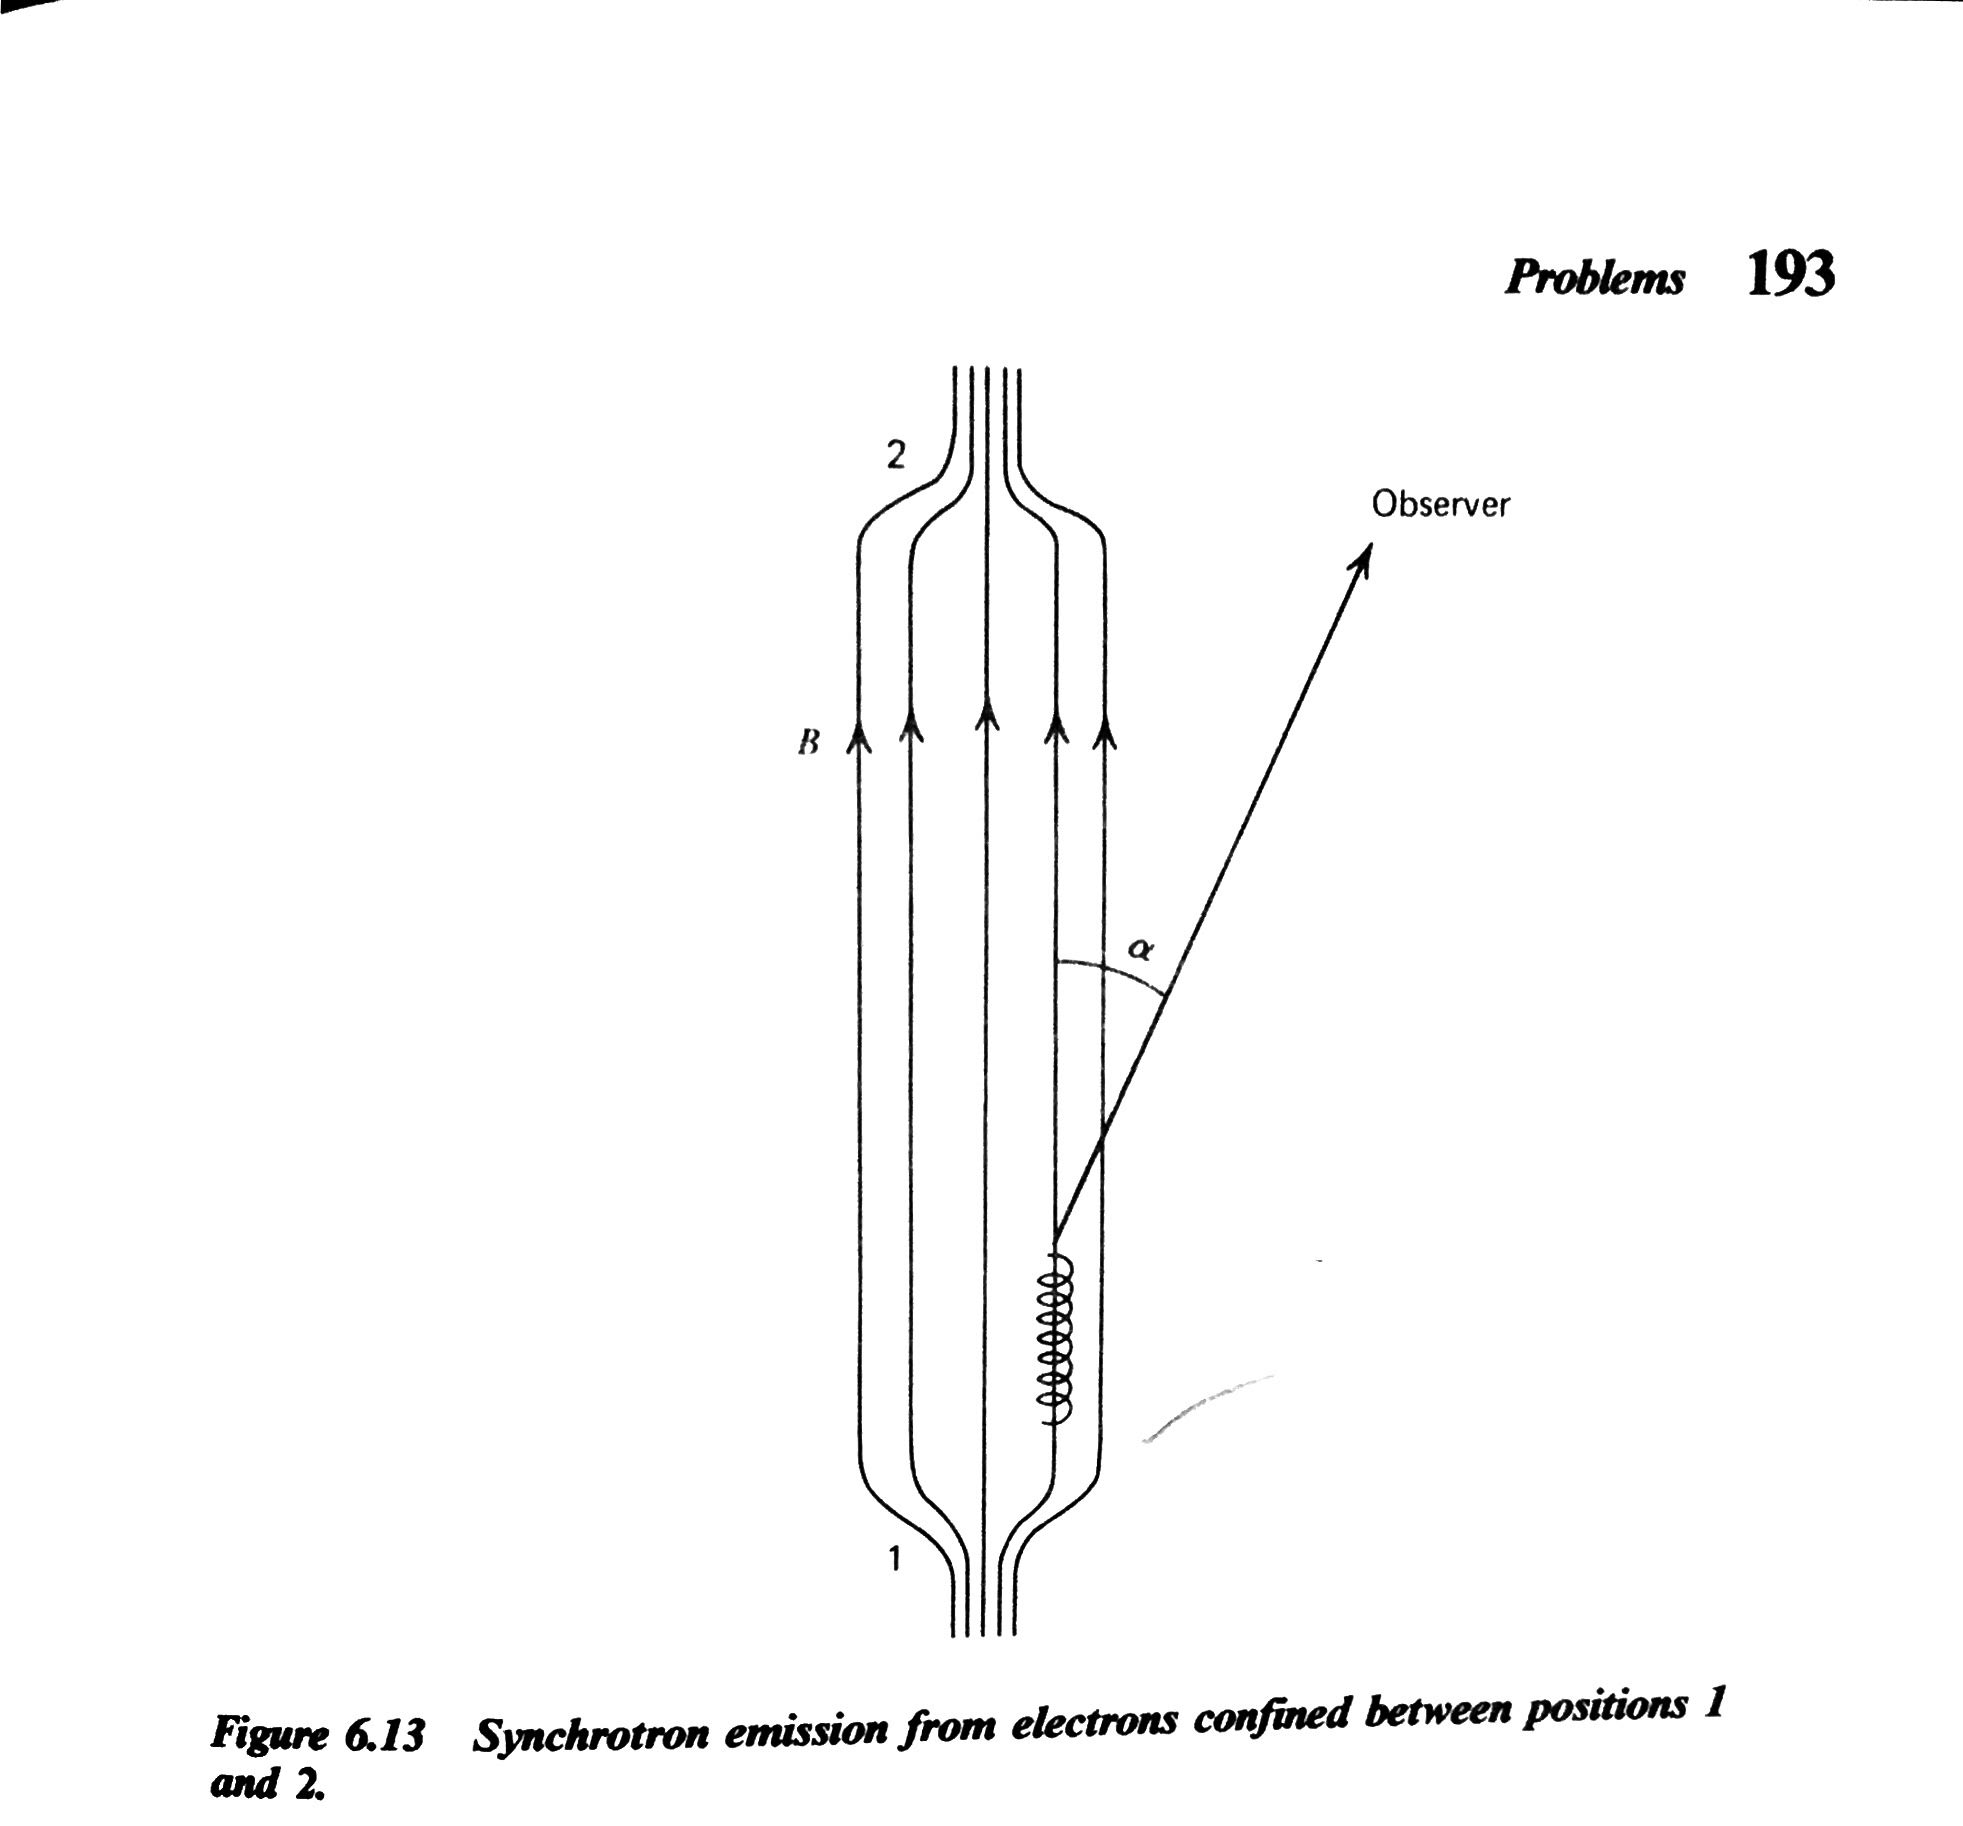


First we import the needed files.

In [45]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML

Next, we define the function and constants. Here we need to calculate the arrival times of the pulses with respect to the time they were emitted. We do this by finding values for t(n-j) = T-j * tau(1-b * cos(alpha)^2.

We define our constants as follows:

N=number of loops between mirrors

beta=velocity of electron/c   
*Beta should be a value between 0<=b<=1.

alpha_d=pitch angle 
*Manipulating this constant shows how changing the angle to observer effects the arrival time of the pulses. This value should be between 0<=aplha_d<=90 and is in units of degrees.

In [46]:
N = 20
alpha_d = 80   # Pitch angle in degrees (should be 0 <= alpha_d <= 90)
beta = 0.8
alpha = alpha_d * np.pi / 180.

Now, we find values for t(n-j), or our plots horizontal (x) axis.

In [47]:
x = np.zeros(2 * N + 1)
y = np.ones(2 * N + 1)

for i in range(N+1):
    x[i] = 1. - ((N - i) / N) * (1. - beta * np.power(np.cos(alpha),2 ))

for i in range(N+1, 2*N+1):
    x[i] = (i / N) * (1. - beta * np.power(np.cos(alpha), 2))
    if np.cos(alpha) > 1.e-15:
        y[i] = 0


Next, we can plot our emission arrival times using mathplotlib.

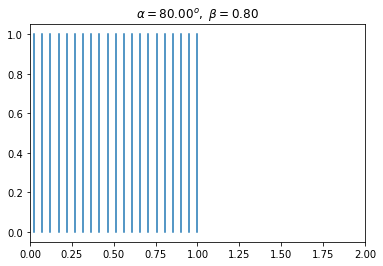

In [48]:
plt.stem(x, y, basefmt = 'None', markerfmt = 'None')
plt.xlim([0,2])
plt.title('$\\alpha = $' + '{0:.2f}'.format(float(alpha_d)) + '$^o$' + \
           '$,\ \\beta = $' + '{0:.2f}'.format(beta))

plt.show()

Now, we will 

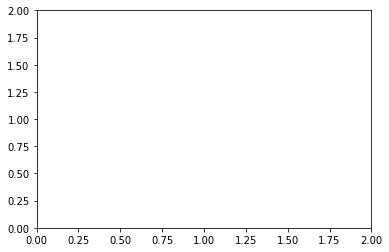

In [49]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((0, 2))

line, = ax.plot([], [], lw=2)

In [50]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.zeros(2 * N + 1)
    y = np.ones(2 * N + 1)

for i in range(N+1):
    x[i] = 1. - ((N - i) / N) * (1. - beta * np.power(np.cos(alpha),2 ))

for i in range(N+1, 2*N+1):
    x[i] = (i / N) * (1. - beta * np.power(np.cos(alpha), 2))
    if np.cos(alpha) > 1.e-15:
        y[i] = 0


In [51]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [52]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available